# Introduction to Dimensionality
* The data matrix;
    - Samples (rows)
    - Columns (attributes)
* If the attributes are $D$ and the samples are $N$
    - The size of the data is $N\times D$
* Dimensionality
    - This refers to the number of attributes in the data matrix
* *eg* Consider the Iris data
    - We have 4 features, 1 output variable, and 150 samples
    - The data matrix can be represented as:
---
|Sample/Feature|$X_1$|$X_2$|$X_3$|$X_4$|$Y$ Class|
|--------------|-----|-----|-----|-----|---------|
|1|...|...|...|...|,,,|
|2|...|...|...|...|,,,|
|3|...|...|...|...|,,,|
|.|...|...|...|...|,,,|
|.|...|...|...|...|,,,|
|150|...|...|...|...|,,,|
___

* Given the number of attributes or features is 4, we can now say the dimensionality of the dataset is 4
    

## Dimensionality Reduction
* Dimensionality reduction refers to reducing the number of attributes used for analysis
* Reducing the number of attributes from $D$ to $K$, $K<D$
* *eg* We can try and reduce the dimensionality of the Iris dataset to 3, 2, or even 1
---
![](dimred1.jpg)
___

* Here is an example of the 4-dimensional iris dataset reduced to 3 dimensions
![](irispca.png)

---

* Here the 4-dimensional iris dataset is reduced to a 2 dimensional dataset
![](irispca2.png)

## Why Dimensionality Reduction?
* The Curse of Dimensionality:
    - **Data sparsity**<br> As mentioned, data becomes sparse, and the distances between samples increases tremendously, meaning that most of the high-dimensional space is empty. This makes clustering and classification tasks challenging.
    - **Increased computation**<br> More dimensions mean more computational resources and time to process the data.
    - **Overfitting**<br> With higher dimensions, models can become overly complex, fitting to the noise rather than the underlying pattern. This reduces the model's ability to generalize to new data.
    - **Distances lose meaning**<br> In high dimensions, the difference in distances between data points tends to become negligible, making measures like Euclidean distance less meaningful.
    - **Performance degradation**<br> Algorithms, especially those relying on distance measurements like k-nearest neighbors, can see a drop in performance.
    - **Visualization challenges**<br> High-dimensional data is hard to visualize, making exploratory data analysis more difficult.

---
![](curse.png)

#### Sparsity example
* If you pick two points randomly in a unit square, the distance between these two points will be on average, .52
* If you pick two random points in a unit 3D cube, the average distance will be roughly .66
* In a 1 million-dimensional hypercube, the average distance is about 408.25
---
**This is quite counterintuitive, how can two points be so far apart when they both lie within the same hypercube?**
___

#### Solutions to the curse of Dimensionality
* One possible solution is to have more training instances to have sufficient density for making reliable predictions
    - *Caveat*: Number of training samples required for maintaining sufficient training instances increases exponentially with the number of dimensions/features

## Methods for Dimensionality Reduction
* Feature Selection
    - Selecting a few from the existing features
    - Forward Selection (start with none, select each features and)
    - Backward Selection (start with all, reduce one at a time and)
* Feature Extraction
    - Extract fewer features as transformation/combination of existing features
* Focus on feature extraction methods
    - We will see what guides these combinations

## Feature Extraction
* The idea is to obtain the new features from the combination of existing features
* Linear combination of attributes
    - PCA
    - LDA
* Non-linear combination of attributes
    - Kernel PCA
* We will see how to choose the right combinations (projections or transformations)

#### Combinations are chosen based on 
* Goals of dimensionality reductions
    - preserve as much information as possible
    - preserve class separability/ class discrimination
* the data available

## Linear Transformation based-Techniques
* Unsupervised learning framework (labels not available):<br> The goal is to find the combinations of the variables that reduce the dimensionality and preserve the variance in the data (PCA)
* Supervised learning framework (label are available):<br> The goal is to find combinations of the variables that reduce the dimensionality and preserve class separability (LDA)

## Principal Component Analysis
* It is an unsupervised framework
* Only features are used (no labels available)
* Find the lower dimensional hyperplane, which preserves the maximum variance in the data
* Project the data onto the hyperplane

#### Rationale for choosing the projection
* Intuition: More likely to lose less information 
* Algebraic: The hyperplane that preserves maximum variance is the one that minimizes the mean squared distance between the original dataset and its projection onto the lower dimension hyperspace

#### Orthogonality of the Principal components
* PCA identifies the axis that accounts for the maximum variance in the data
* It also finds an axis that is orthogonal to the first axis, that accounts for the largest amount of remaining variance
* In a higher dimensional plane, PCA identifies the third axis that is perpendicular to both the previous axis and explains the maximum of the variance left out

#### Intutition
* Goal:
    - Project the data into lower dimensional hyperplane which preserves maximum variance in the data
    - Usually we select the number of principal components that preserves 95% variance.
* what matrix will explain the variance in the data with multiple features?
    - The Covariance matrix
        * Top singular vectors of covariance matrix are the directions of maximal variance in the data
        * The associated singular values are equal to these variances
        
#### Mathematically
* The projection of columns of $X$ on the direction of columns of $W$ is:
<p style='text-align:center;'>$Z_{m\times N}=X_{m\times N}W_{N\times N}$</p>

* where,
    - $Z_{m\times N}$ is the transformed data matrix
    - $X_{m\times N}$ is the original data matrix
    - $W_{N\times N}$ is the principal components matrix
![](pca.jpg)

#### New features of Desired dimensions k
* New features of desired dimensions $k$ can be obtained from the initial data by the following transformation
<p style='text-align:center;'>$Z_{m\times N}=X_{m\times N}W_{N\times N}$</p>

* where,
    - $Z_{m\times k}$ is the transformed data matrix
    - $X_{m\times N}$ is the original data matrix
    - $W_{N\times k}$ is the principal components matrix


## Procedure to find Principal components
* Say we have a data matrix $X_{m\times N}$
    1. Preprocess the data
        - Center the data
            - subtract the mean from each feature
        - Scale the features
            - scale features with the variance of range (important if features have different orders of magnitude)
    2. Calculate the Sample Covariance Matrix ($S$)
    3. Perform SVD of $S$
        - $U$ matrix from the SVD of $S$ will have PCs as its columns
    4. Choose number of PCs to be used (matrix of columns of $U$ used is $W$)
    5. Perform the transformation
        - $Z=XW$

### Example 2D to 1D
---
* the data is:
---
|$X_1$|$X_2$|
|:-----:|:-----:|
|2.5|2.4|
|.5|.7|
|2.2|2.9|
|1.9|2.2|
|3.1|3|
|2.3|2.7|
|2|1.6|
|1|1.1|
|1.5|1.6|
|1.1|.9|

---

1. Preprocess the data (center the data)
---
|$(X_1-\mu_1)$|$(X_2-\mu_2)$|
|:-----:|:-----:|
|0.69|0.49|
|-1.31|-1.21|
|0.39|0.99|
|0.09|0.29|
|1.29|1.09|
|0.49|0.79|
|0.19|-0.31|
|-0.81|-0.81|
|-0.31|-0.31|
|-0.71|-1.01|

---
2. If the data matrix is $X$ (mean centered) then the sample covariance matrix of the data can be calculated by $S = \frac{1}{n-1}X^TX$
---
<p style='text-align:center;'>Covariance Matrix$=\begin{bmatrix}.6166& .6154 \\ .6154& .7166\end{bmatrix}$</p>

---
3. SVD of $S$ to find the principal components
---
<p style='text-align:center;'>$\mathbf{U,\Sigma,V}=$SVD $(\mathbf{S})$</p>

we will extract the matrix $\mathbf{U}=\begin{bmatrix}-.6779& -.7352\\ -.7352& .6779\end{bmatrix}$

Our principal components are: $\mathbf{PC1}=\begin{bmatrix}-.6779\\ -.7352\end{bmatrix}$ and  $\mathbf{PC2}=\begin{bmatrix}-.7352\\ .6779\end{bmatrix}$

---
4. Lower dimensional data matrix
---
Original data of size $10\times 2$ can be now reduced to $10\times 1$ by considering the first PC (it has the larger eigenvalue) from the 2PCs of $\mathbf{U}$

The transformation takes place as:

<p style='text-align:center;'>$Z_i=D_i@PC_s$</p>

* where,
    - $Z_i$ is the transformation of the $i$th datapoints
    - $D_i$ is the datapoint prior to transformation
    - $PC_s$ is the principal component used in the transformation

* taking the first datapoint, we get:

<p style='text-align:center;'>$\begin{bmatrix}.69 & .49\end{bmatrix}@\begin{bmatrix}-.6779\\ -.7352\end{bmatrix}=\begin{bmatrix}-.8280\end{bmatrix}$</p>

|$Z=D_{\mu}\times E_1$|
|:-----:|
|-.8280
|1.7776|
|-.9922|
|-.2742|
|-1.6758|
|-.9129|
|.0991|
|1.1446|
|.4380|
|1.2238|


In [142]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as scla

data = np.array([[2.5,2.4],[.5,.7],[2.2,2.9],[1.9,2.2],[3.1,3],[2.3,2.7],[2,1.6],[1,1.1],[1.5,1.6],[1.1,.9]])

# centering the data about column means
centeredData= data-np.mean(data,axis=0)

# the sample covariance
covmat = centeredData.T@centeredData/(data.shape[0]-1)

# the SVD
[U,S,_] = scla.svd(covmat)

# projecting the data onto the second principal components
proj_data = centeredData@U

# the reconstruction using one PC
Xapprox = proj_data[:,0].reshape(10,1)*U.T[:,0].reshape(1,2)

# the reconstruction using two PC
Xtrue = proj_data@U.T

In [77]:
# the two PC are orthogonal
np.dot(U[:,0],U[:,1])

0.0

In [145]:
# finding the percentage variance explained
percent = S*100/np.sum(np.diag(S))
percent

# therefore we can see that the first PC explains 96.3% of the variance in the data

array([96.31813143,  3.68186857])

In [73]:
np.linalg.eig(covmat) 
# we can see the second eigenvalue is larger
# we will now use the second eigenvector to project the data onto

EigResult(eigenvalues=array([0.0490834 , 1.28402771]), eigenvectors=array([[-0.73517866, -0.6778734 ],
       [ 0.6778734 , -0.73517866]]))

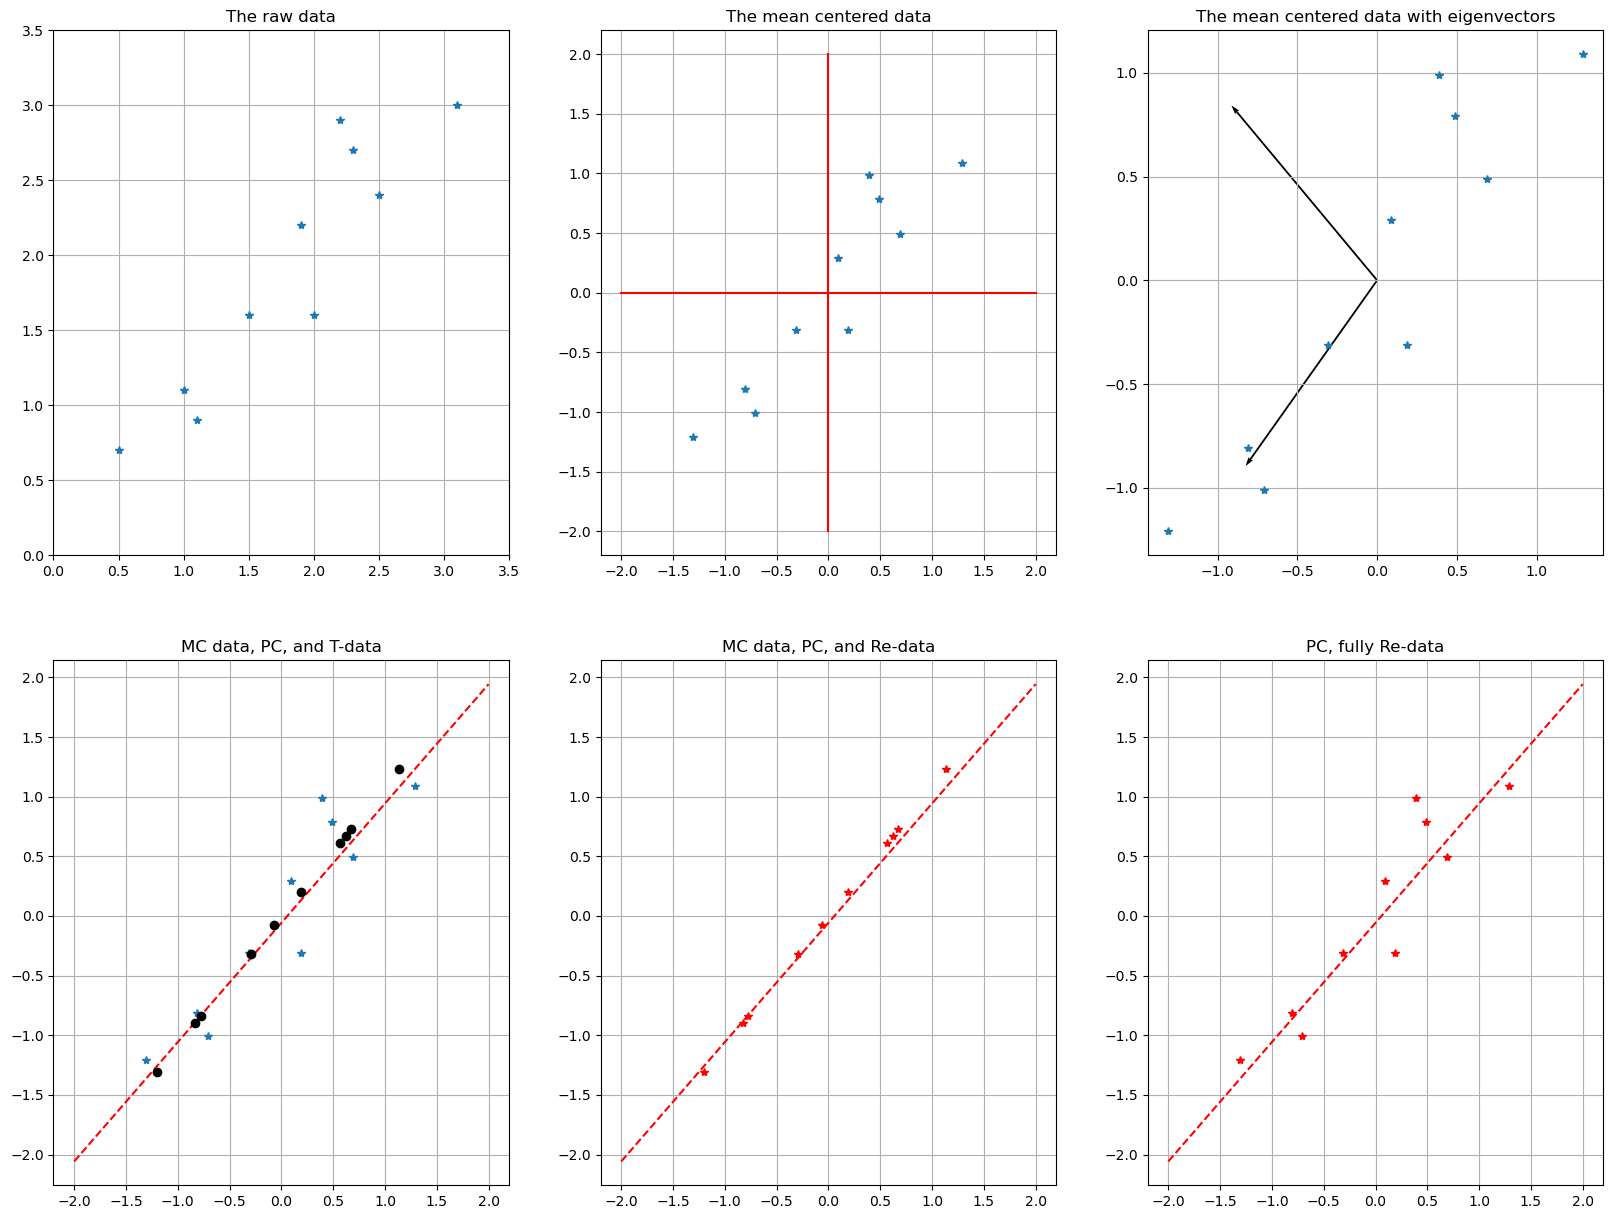

In [138]:
fig,ax = plt.subplots(2,3,figsize=(20,15))

ax[0,0].plot(data[:,0],data[:,1],ls='',marker='*')
ax[0,0].set_xticks(np.arange(0,3.6,.5))
ax[0,0].set_yticks(np.arange(0,3.6,.5))
ax[0,0].grid(True)
ax[0,0].set_title('The raw data')

ax[0,1].plot(centeredData[:,0],centeredData[:,1],ls='',marker='*')
ax[0,1].set_xticks(np.arange(-2,2.5,.5))
ax[0,1].set_yticks(np.arange(-2,2.5,.5))
ax[0,1].plot(np.arange(-2,3),np.repeat(0,5),ls='-',color='r')
ax[0,1].plot(np.repeat(0,5),np.arange(-2,3),ls='-',color='r')
ax[0,1].grid(True)
ax[0,1].set_title('The mean centered data')

ax[0,2].plot(centeredData[:,0],centeredData[:,1],ls='',marker='*')
ax[0,2].set_xticks(np.arange(-2,2.5,.5))
ax[0,2].set_yticks(np.arange(-2,2.5,.5))
ax[0,2].quiver(0,0,U[0,0],U[0,1],units='xy',angles='xy',scale=.8,width=.01)
ax[0,2].quiver(0,0,U[1,0],U[1,1],units='xy',angles='xy',scale=.8,width=.01)
ax[0,2].grid(True)
ax[0,2].set_title('The mean centered data with eigenvectors')

#defining the line
x = np.arange(-2,2.5,.5)
y = U[1,0]+x-U[0,0]
ax[1,0].plot(centeredData[:,0],centeredData[:,1],ls='',marker='*')
ax[1,0].set_xticks(np.arange(-2,2.5,.5))
ax[1,0].set_yticks(np.arange(-2,2.5,.5))
ax[1,0].plot(x,y,ls='--',color='r')
ax[1,0].grid(True)
ax[1,0].set_title('MC data, PC, and T-data')
# the projected points:
ax[1,0].plot(U[0,0]*proj_data[:,0],U[1,0]*proj_data[:,0],ls='',marker='o',color='k')

#partially reconstructed data
x = np.arange(-2,2.5,.5)
y = U[1,0]+x-U[0,0]
# ax[1,1].plot(centeredData[:,0],centeredData[:,1],ls='',marker='*')
ax[1,1].set_xticks(np.arange(-2,2.5,.5))
ax[1,1].set_yticks(np.arange(-2,2.5,.5))
ax[1,1].plot(x,y,ls='--',color='r')
ax[1,1].grid(True)
ax[1,1].set_title('MC data, PC, and partially Re-data')
# the reconstructed data:
ax[1,1].plot(Xapprox[:,0],Xapprox[:,1],ls='',marker='*',color='r')

#fully reconstructed data
x = np.arange(-2,2.5,.5)
y = U[1,0]+x-U[0,0]
ax[1,2].set_xticks(np.arange(-2,2.5,.5))
ax[1,2].set_yticks(np.arange(-2,2.5,.5))
ax[1,2].plot(x,y,ls='--',color='r')
ax[1,2].grid(True)
ax[1,2].set_title('PC, fully Re-data')
# the reconstructed data:
ax[1,2].plot(Xtrue[:,0],Xtrue[:,1],ls='',marker='*',color='r')


plt.show()

## Orthogonality of PCs revisited
* PC1 and PC2 are orthogonal to each other
* PC1 is a line which captures the maximum variance in the data
* PC2 is orthogonal to PC1 and explains the maximum variance in the data after PC1

## Uncorrelation of the transformed features
* The number of new variables $Z$ are as many as the initial variables
* However they are uncorrelated as opposed to initial attributes

## Reconstructing approximate original data
<p style='text-align:center;'>$X_{10\times 2} \sim Z_{10\times 1}U^T_{red 1\times 2}$</p>

* We will use one PC to reconstruct $X$ approximately

|$Z*PC^T$|
|:-----:|
|0.56125896,  0.60870601|
|-1.20497442, -1.30683911|
|0.67258429,  0.72944242|
| 0.18587995,  0.20159364|
| 1.1359812 ,  1.23201343|
| 0.61886391,  0.67118069|
|-0.06718365, -0.07286314|
|-0.77587502, -0.84146502|
|-0.29693982, -0.32204217|
|-0.8295954 , -0.89972675|

## How to select number of PCs
* Selection of number of PCs
    - percentage of explained variance by the PCs
* Generally, select the number of PCs that can explain about 95% of the variance in the data
* One way is to run the full SVD with a `for` loop from 1 to $N$ PCs and see the variance explained as the number of PCs increases
* The far easier way is to use sigma values obtained from the SVD of the sample covariance matrix
    - Sigma is the singular value matrix obtained from performing SVD on the data covariance matrix
* The variance explained ratio of an eigenvalue $\lambda_j$ is simply the fraction of an eigenvalue $\lambda_j$ and the total sum of eigenvalues:

<p style='text-align:center;'>Variance explained by $\lambda_j = \lambda_j/\Sigma_i^N\lambda_i$</p>

* This can be converted to a percentage by multiplying it by 100
* *eg* in our example, we found that the first PC explains 96.3% of variance in the data

## Scree Plot
* A plot with number of PCs in X-axis and the eigenvalue corresponding to them in the Y-axis

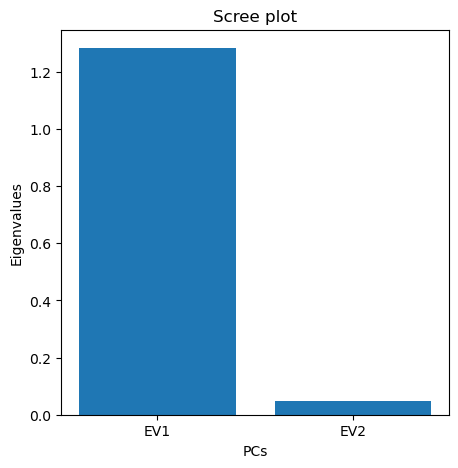

In [167]:
# scree plot
fig,ax =plt.subplots(figsize=(5,5))
rects = ax.bar(x=[1,2],height=S)
# ax.bar_label(rects,['EV1','EV2'])
ax.set_xticks(np.arange(1,3),['EV1','EV2'])
ax.set_xlabel('PCs')
ax.set_ylabel('Eigenvalues')
ax.set_title('Scree plot')
plt.show()

## Optimization problem
* Say we have mean-centered data matrix $X=X@W$, that is transformed into mean-centered matrix $Z$. We want to optimize the $Z$ to have the highest possible covariance:

<p style='text-align:center;'>$max (XW)^TXW= W^TX^TXW\hspace{10pt}$<br>$ s.t. W^TW=1$</p>


* By the Langrangian method,

$L(W,\lambda) = W^TX^TXW -\alpha(W^TW-1)$

$\frac{\partial L}{\partial W} = X^TXW -\alpha W=0$

$\frac{\partial L}{\partial \alpha} = W^TW -1=0$

* The optimization problem has now become an eigenvalue problem

$(X^TX)W=\alpha W$

## Limitations of PCA
* Sensitive to outliers
* Scaling of data is a must
* Assumes that the features are linearly dependent, and the transformed variables are linear combinations of the original variables


## Advices on applying DimReduction Techniques
* General:
    - First, try to train the system with original data before resorting to dimensionality reduction
    - If the training is too slow, then resort to dimensionality reduction
* Dont bring the PCA/other dimensionality reduction in your main pipeline of project initially